In [1]:
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
import scipy.optimize as opt
%matplotlib inline

In [10]:
X = np.random.randint(0,100000, size = 500)

In [11]:
eps = sts.norm.rvs(loc = 0, scale = 0.2,size = 500 )

In [12]:
Y = 0.5*X+1+eps

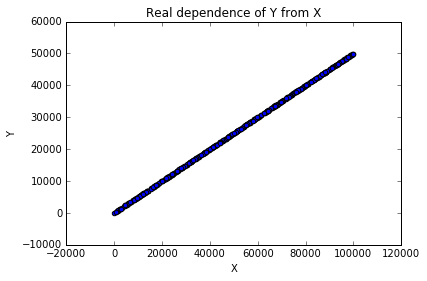

In [14]:
plt.scatter(X,Y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Real dependence of Y from X')

In [15]:
def fun(args):
    error = ((args[0]*X + args[1] - Y).reshape(1,500)).dot((args[0]*X + args[1] - Y).reshape(500,1))
    return error[0][0]

In [25]:
fun((1,1))

419798368728.87476

In [40]:
res = opt.minimize(fun, x0 = [1.0,1.0],method = 'Nelder-Mead', tol = 1e-6)

In [41]:
res

  status: 0
    nfev: 145
 success: True
     fun: 20.046832284563472
       x: array([ 0.49999985,  1.01539178])
 message: 'Optimization terminated successfully.'
     nit: 76

In [42]:
x = np.array(range(0,100000,10))

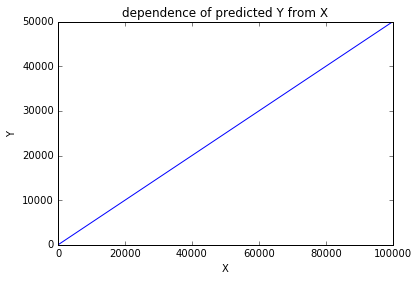

In [43]:
plt.plot(x, res.x[0]*x+res.x[1])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('dependence of predicted Y from X')

In [44]:
eps_add = sts.norm.rvs(loc = 0, scale = 0.2,size = 75 )

In [45]:
Y_add = -1 + eps_add

In [46]:
X_add = np.random.randint(0,100000, size = 75)

In [47]:
X_new = np.append(X, X_add)

In [48]:
Y_new = np.append(Y, Y_add)

In [49]:
def fun_MSE(args):
    error = ((args[0]*X_new + args[1] - Y_new).reshape(1,575)).dot((args[0]*X_new + args[1] - Y_new).reshape(575,1))
    return error[0][0]

In [50]:
def fun_MAE(args):
    error = sum(abs(args[0]*X_new + args[1] - Y_new))
    return error

In [51]:
res_MAE = opt.minimize(fun_MAE, x0 = [1.0,1.0],method = 'Nelder-Mead', tol = 1e-6)

In [52]:
res_MSE = opt.minimize(fun_MSE, x0 = [1.0,1.0],method = 'Nelder-Mead', tol = 1e-6)

In [53]:
res_MAE

  status: 0
    nfev: 186
 success: True
     fun: 2054081.2983278006
       x: array([ 0.49999985,  0.96870185])
 message: 'Optimization terminated successfully.'
     nit: 98

In [54]:
res_MSE

  status: 0
    nfev: 321
 success: True
     fun: 62171419103.002785
       x: array([  4.13270578e-01,   8.46816575e+02])
 message: 'Optimization terminated successfully.'
     nit: 150

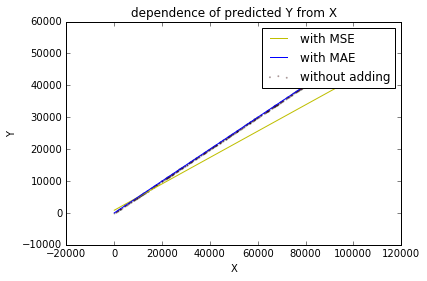

In [68]:
plt.plot(x, res_MSE.x[0]*x+res_MSE.x[1], label = 'with MSE', c = 'y')
plt.plot(x, res_MAE.x[0]*x+res_MAE.x[1], label = 'with MAE', c = 'b')
plt.scatter(X,Y, label = 'without adding', s = 1, alpha=0.3, c ='r')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('dependence of predicted Y from X')
plt.legend()

MAE более устойчива к выбросам, так как абсолютное отклонение вносит меньший вклад в ошибку, в сравнении с квадратом отклонения, поэтому модель в случае MSE переобучается под выбросы